<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [4]:
svm_clf = SVC(gamma=0.001, C=100, kernel='rbf')
svm_clf.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [5]:
def Decision_Function(X_cv, gamma):
    decision_function = []
    
    for x_q in X_cv:
        alpha = svm_clf.dual_coef_[0]
        intercept = svm_clf.intercept_[0]
        for i, sv in enumerate(svm_clf.support_vectors_):
            norm = np.linalg.norm(sv-x_q)
            k_rbf = np.exp(- gamma * (norm**2))
            intercept += (alpha[i] * k_rbf)
        decision_function.append(intercept)
    
    return np.array(decision_function)
            

In [6]:
res = Decision_Function(X_cv, 0.001)
res

array([-1.97888760e+00,  1.58025599e+00, -1.81965066e+00, -2.51815410e+00,
       -5.47425612e-01,  1.01757463e+00,  1.98782423e+00,  1.37265429e+00,
        2.38214004e+00,  1.49468757e+00,  1.63550728e+00, -3.21880199e+00,
        2.30562798e-01, -3.71923600e+00,  7.07598682e-01, -1.54676929e+00,
       -3.33503789e+00, -9.82163688e-01, -2.45880273e+00, -2.74246073e+00,
       -2.86032100e+00, -2.47497184e+00,  2.65402058e+00, -3.46381840e+00,
        1.71475213e+00, -1.48173860e+00, -3.21129175e+00, -1.43357045e+00,
       -2.29592885e+00, -2.16258208e+00,  1.82312752e+00,  2.67148640e-01,
       -8.17907588e-01, -3.91750916e+00, -2.19170637e+00, -1.76063729e+00,
       -1.53764931e+00, -3.94968735e+00, -2.77571481e+00, -4.40130518e-01,
       -2.28764650e+00, -4.15844071e+00,  3.02736249e+00, -2.77243606e+00,
       -4.02370855e+00, -2.21343640e+00, -1.52390808e+00,  6.84121784e-04,
       -1.67470059e+00, -3.38291186e-01,  1.82861529e+00,  1.49846604e-01,
        1.67699454e+00,  

In [7]:
svm_clf.decision_function(X_cv)

array([-1.97888760e+00,  1.58025599e+00, -1.81965066e+00, -2.51815410e+00,
       -5.47425612e-01,  1.01757463e+00,  1.98782423e+00,  1.37265429e+00,
        2.38214004e+00,  1.49468757e+00,  1.63550728e+00, -3.21880199e+00,
        2.30562798e-01, -3.71923600e+00,  7.07598682e-01, -1.54676929e+00,
       -3.33503789e+00, -9.82163688e-01, -2.45880273e+00, -2.74246073e+00,
       -2.86032100e+00, -2.47497184e+00,  2.65402058e+00, -3.46381840e+00,
        1.71475213e+00, -1.48173860e+00, -3.21129175e+00, -1.43357045e+00,
       -2.29592885e+00, -2.16258208e+00,  1.82312752e+00,  2.67148640e-01,
       -8.17907588e-01, -3.91750916e+00, -2.19170637e+00, -1.76063729e+00,
       -1.53764931e+00, -3.94968735e+00, -2.77571481e+00, -4.40130518e-01,
       -2.28764650e+00, -4.15844071e+00,  3.02736249e+00, -2.77243606e+00,
       -4.02370855e+00, -2.21343640e+00, -1.52390808e+00,  6.84121785e-04,
       -1.67470059e+00, -3.38291186e-01,  1.82861529e+00,  1.49846604e-01,
        1.67699454e+00,  

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [8]:
N_p = []
N_n = []

for i in y_train:
    if i == 0:
        N_n.append(i)
    else:
        N_p.append(i)

N_pos = len(N_p)
N_neg = len(N_n)
print(N_pos, N_neg)

969 2231


In [9]:
Y_p = (N_pos + 1) / (N_pos + 2)
Y_n = 1 / (N_neg + 2)

print('Y+ :', Y_p)
print('Y- :', Y_n)

Y+ : 0.9989701338825953
Y- : 0.0004478280340349306


In [10]:
new_y_cv = []

for j in y_cv:
    if j == 0:
        new_y_cv.append(Y_n)
    else:
        new_y_cv.append(Y_p)

In [21]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    
    w = np.zeros_like(dim)
    b = 0    #initialize bias to zero

    return w,b


def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    S = 1 / (1 + np.exp(-z))

    return S


def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    loss = -np.sum(y_true * np.log10(y_pred) + (1 - y_true) * np.log10(1 - y_pred)) / len(y_true)
    
    return loss


def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w.T,x) + b
    Sigma = 1 / (1 + np.exp(-z))
    dw = x * (y - Sigma) - (alpha / N) * w

    return dw


def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    z = np.dot(w.T,x) + b
    Sigma = 1 / (1 + np.exp(-z))
    db = y - Sigma

    return db


def train(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows

    # initalize the weights (call the initialize_weights(X_train[0]) function)
    w,b = initialize_weights(X_train[0])
    train_loss = []
    
    for i in range(1, epochs): # for every epoch
        for j in range(len(X_train)): 
            dw = gradient_dw(X_train[j], y_train[j], w,b,alpha,N)   #compute gradient w.r.to w (call the gradient_dw() function)
            db = gradient_db(X_train[j], y_train[j],w,b)     #compute gradient w.r.to b (call the gradient_db() function)
            w += eta0 * dw     #update w, b
            b += eta0 * db
        
        train_pred = 1 / (1 + np.exp(-(w * X_train[j] + b )))
        loss__ = logloss(y_train, train_pred)
        train_loss.append(loss__)

    return w,b, train_loss

In [22]:
alpha=0.0001
eta0=0.0001
N = len(y_cv)
epochs=50
w,b, train_loss =train(new_y_cv ,y_cv,epochs=50, alpha=0.0001, eta0=0.0001 )

In [23]:
w

array(0.59521341)

In [24]:
b

-0.5617316540730602

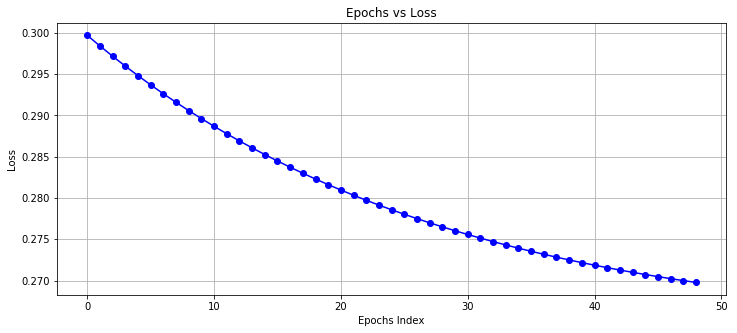

In [60]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,5))
plt.grid()
plt.plot(train_loss, 'bo-')
plt.xlabel('Epochs Index')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')

plt.show()

In [19]:
f_test = Decision_Function(X_test, 0.001)

In [20]:
P = 1 / (1 + np.exp(-(w * f_test + b)) )
P

array([0.09702454, 0.63003473, 0.07429898, 0.22356374, 0.06565156,
       0.08165554, 0.06609669, 0.112658  , 0.09100431, 0.14475441,
       0.48267952, 0.28717879, 0.48588831, 0.61539078, 0.15876487,
       0.08346671, 0.62483842, 0.43921299, 0.1295862 , 0.22802359,
       0.09892646, 0.06653532, 0.58937411, 0.10234878, 0.34603196,
       0.06235281, 0.447911  , 0.08297291, 0.55921328, 0.52024073,
       0.05856452, 0.40832589, 0.0492542 , 0.08734458, 0.06656385,
       0.06416833, 0.13968775, 0.52876713, 0.60841871, 0.06810995,
       0.12984794, 0.07284923, 0.08263147, 0.44267508, 0.07686458,
       0.13577859, 0.20898613, 0.11779668, 0.27624542, 0.31490497,
       0.23849185, 0.10401762, 0.33290468, 0.06253348, 0.14637856,
       0.17487115, 0.11994508, 0.09445904, 0.5504905 , 0.17596054,
       0.14046386, 0.34560603, 0.13313799, 0.12355172, 0.20253426,
       0.06956789, 0.59015968, 0.03857046, 0.11760748, 0.06117416,
       0.12063764, 0.06284277, 0.20311709, 0.21384075, 0.60746

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
